In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.load_model('../trained_models/model1/m06b_test1')

In [12]:
model.Group_NN.input

<KerasTensor: shape=(None, 804) dtype=float32 (created by layer 'dense_input')>

In [13]:
input_technique_data_sources =         tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_data_sources')
input_technique_detection_name =       tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_detection_name')
input_technique_mitigation_id =        tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_mitigation_id')
input_technique_platforms =            tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_platforms')
input_technique_software_id =          tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_software_id')
input_technique_tactics =              tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_tactics')
input_technique_interaction_rate =     tf.keras.Input(shape=(1,), dtype=tf.float32, name='input_technique_interaction_rate')
input_technique_description =          tf.keras.Input(shape=(768,), dtype=tf.float32, name='input_technique_description')

vectorize_software_id =              model.vectorize_software_id
vectorize_tactics =              model.vectorize_tactics
vectorize_technique_data_sources =         model.vectorize_technique_data_sources
vectorize_technique_detection_name =       model.vectorize_technique_detection_name
vectorize_technique_mitigation_id =        model.vectorize_technique_mitigation_id
vectorize_technique_platforms =            model.vectorize_technique_platforms

embed_software_id =              model.embed_software_id
embed_tactics =                model.embed_tactics
embed_technique_data_sources =         model.embed_technique_data_sources
embed_technique_detection_name =       model.embed_technique_detection_name
embed_technique_mitigation_id =        model.embed_technique_mitigation_id
embed_technique_platforms =            model.embed_technique_platforms

concatenate = tf.keras.layers.Concatenate (axis=1)

technique_nn = model.Technique_NN

In [14]:
sub_mode_data_sources = tf.keras.models.Sequential(
    [
        input_technique_data_sources,
        vectorize_technique_data_sources,
        embed_technique_data_sources
    ]
)

In [15]:
sub_model_data_sources = tf.keras.models.Sequential(
    [
        input_technique_data_sources,
        vectorize_technique_data_sources,
        embed_technique_data_sources
    ]
)
sub_model_detection_name = tf.keras.models.Sequential(
    [
        input_technique_detection_name,
        vectorize_technique_detection_name,
        embed_technique_detection_name
    ]
)
sub_model_mitigation_id = tf.keras.models.Sequential(
    [
        input_technique_mitigation_id,
        vectorize_technique_mitigation_id,
        embed_technique_mitigation_id
    ]
)
sub_model_platforms = tf.keras.models.Sequential(
    [
        input_technique_platforms,
        vectorize_technique_platforms,
        embed_technique_platforms
    ]
)
sub_model_software_id = tf.keras.models.Sequential(
    [
        input_technique_software_id,
        vectorize_software_id,
        embed_software_id
    ]
)
sub_model_tactics = tf.keras.models.Sequential(
    [
        input_technique_tactics,
        vectorize_tactics,
        embed_tactics
    ]
)

technique_data_sources = tf.reduce_mean (sub_model_data_sources.output, axis = 1)
technique_detection_name = tf.reduce_mean (sub_model_detection_name.output, axis = 1)
technique_mitigation_id = tf.reduce_mean (sub_model_mitigation_id.output, axis = 1)
technique_platforms = tf.reduce_mean (sub_model_platforms.output, axis = 1)
technique_software_id = tf.reduce_mean (sub_model_software_id.output, axis = 1)
technique_tactics = tf.reduce_mean (sub_model_tactics.output, axis = 1)

technique_concat = tf.keras.layers.Concatenate(axis=-1)

concatenated_features = technique_concat (
    [
    input_technique_interaction_rate,
    input_technique_description,
    technique_data_sources,
    technique_detection_name,
    technique_mitigation_id,
    technique_platforms,
    technique_software_id,
    technique_tactics, 
    ]
)
sub_model_technique_nn = model.Technique_NN
norm_output_Technique = tf.linalg.l2_normalize (concatenated_features, axis = 1)
learned_feature = sub_model_technique_nn(norm_output_Technique)

sub_model = tf.keras.models.Model (
    inputs = {
        'input_technique_data_sources' : input_technique_data_sources,
        'input_technique_detection_name' : input_technique_detection_name,
        'input_technique_mitigation_id' : input_technique_mitigation_id,
        'input_technique_platforms' : input_technique_platforms,
        'input_technique_software_id' : input_technique_software_id,
        'input_technique_tactics' : input_technique_tactics,
        'input_technique_interaction_rate' : input_technique_interaction_rate,
        'input_technique_description' : input_technique_description,
    },
    outputs = learned_feature
)

In [16]:
sub_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_technique_data_sources (  [(None, None)]      0           []                               
 InputLayer)                                                                                      
                                                                                                  
 input_technique_detection_name  [(None, None)]      0           []                               
  (InputLayer)                                                                                    
                                                                                                  
 input_technique_mitigation_id   [(None, None)]      0           []                               
 (InputLayer)                                                                               

In [17]:
from tensorflow.keras.utils import plot_model

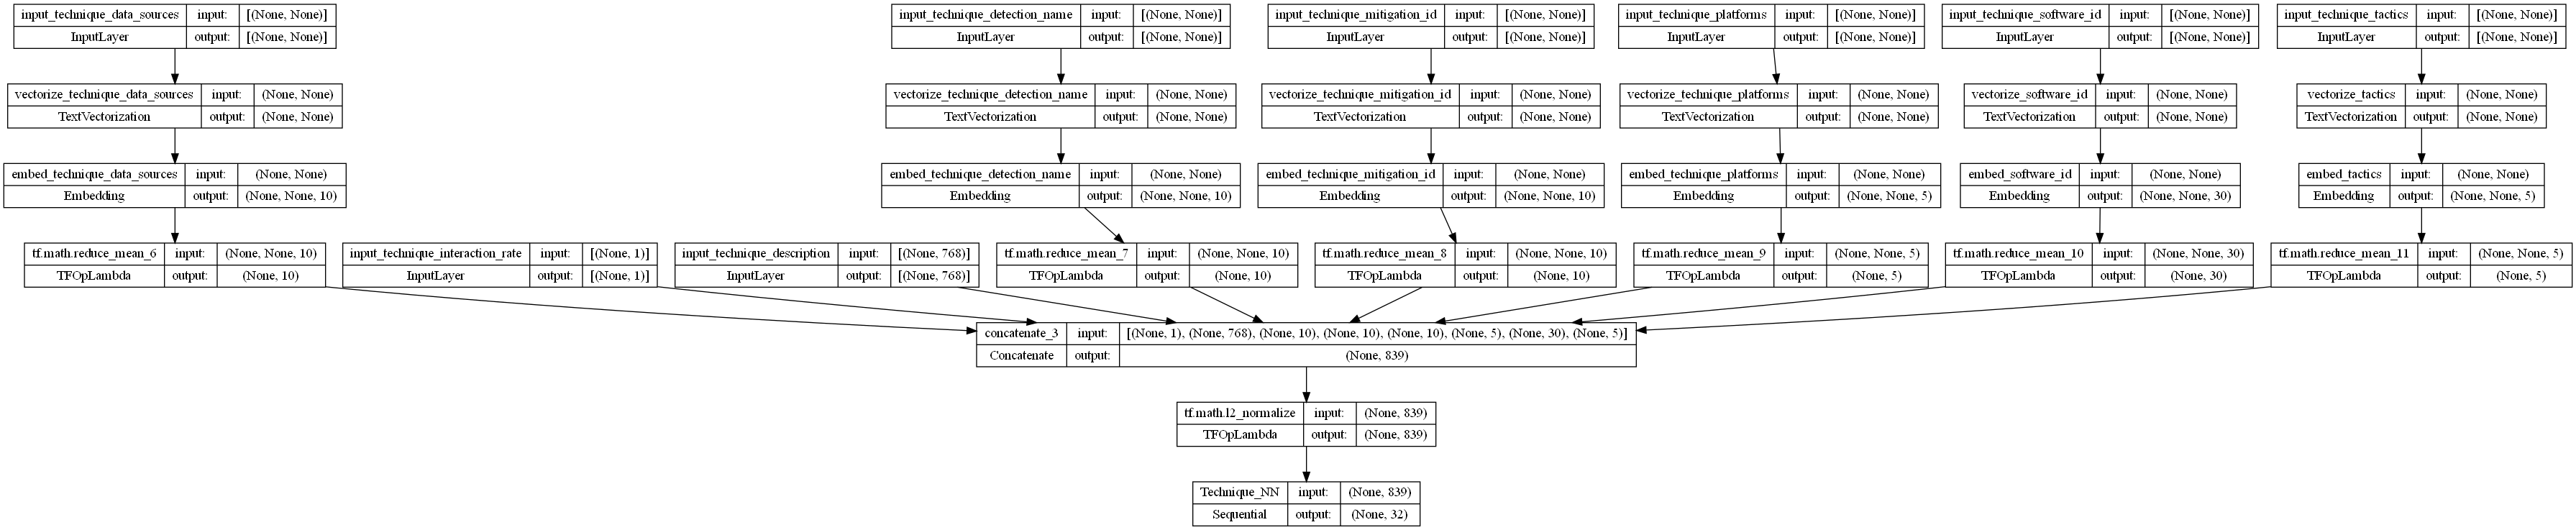

In [18]:
plot_model(sub_model, to_file='sequential_model.png', show_shapes=True)